This example file is intended to cover computations for the computations in the publications

    Bankmann, D.; Mehrmann, V.; Nesterov, Y.; van Dooren, P., Computation of the analytic center of the solution set of the linear matrix inequality arising in continuous- and discrete-time passivity analysis, 2019

    C. A. Beattie, V. Mehrmann, and P. Van Dooren, “Robust port-Hamiltonian representations of passive systems,” Automatica, vol. 100, pp. 182–186, Feb. 2019.

# Initialization

In [11]:
import logging
import numpy as np
from os.path import join, dirname
from analyticcenter import WeightedSystem, get_algorithm_object
from analyticcenter.visualize import log_log_direction
from analyticcenter.examples.example2 import sys
print("A =\n{}\nB\n= {}\nC\n= {}\nD\n= {}\nQ\n= {}\nR\n= {}\nS\n= {}".format(sys.A, sys.B, sys.C, sys.D, sys.Q, sys.R, sys.S))

A =
[[-1.50080778 -1.21394292 -1.21710862 -0.77574412 -0.74807037 -1.05679792]
 [-1.21394292 -1.49357659 -1.44229751 -0.89131319 -0.9786902  -1.06565598]
 [-1.21710862 -1.44229751 -1.97541223 -1.02108958 -1.12364604 -1.01412435]
 [-0.77574412 -0.89131319 -1.02108958 -1.00615708 -0.85553077 -0.82423194]
 [-0.74807037 -0.9786902  -1.12364604 -0.85553077 -1.17729466 -0.59814881]
 [-1.05679792 -1.06565598 -1.01412435 -0.82423194 -0.59814881 -1.44542016]]
B
= [[-0.88460048 -0.97766091 -0.8613933 ]
 [-1.06813806 -1.09817175 -0.77425021]
 [-1.25260106 -1.60303795 -1.01843476]
 [-0.84566917 -1.02193516 -0.68000456]
 [-0.84269114 -1.0559086  -0.58483921]
 [-0.92523203 -0.83030147 -0.70661035]]
C
= [[0.88460048 1.06813806 1.25260106 0.84566917 0.84269114 0.92523203]
 [0.97766091 1.09817175 1.60303795 1.02193516 1.0559086  0.83030147]
 [0.8613933  0.77425021 1.01843476 0.68000456 0.58483921 0.70661035]]
D
= [[1.06208875 0.97030433 0.82668293]
 [0.97030433 1.49781723 0.80937585]
 [0.82668293 0.809

# Computation of analytic center with the newton approach.

In [13]:
logger = logging.getLogger()

alg_newton = get_algorithm_object(sys, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton, success) = alg_newton()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 0.0004566734778481469 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 1.5284051272815766e-21 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 4.893915545882789	Det: 0.00045667

In [5]:
sys_disc = sys.bilinear_discretization()

alg_newton_disc = get_algorithm_object(sys_disc, 'newton', discrete_time=True, save_intermediate=True)
(ac_newton_disc, success) = alg_newton_disc()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Computing Analytic Center with Newton approach (direction.py:151)
[INFO    ][InitialXDT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXDT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 1.8292156619750145e-05 (initialization.py:67)
[INFO    ][InitialXDT] --- Computed initial guess with bisection approach.
det(H(X0)) = 2.9218804364277234e-22 (initialization.py:78)
[INFO    ][InitialXDT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 0	Residual: 2.4494897427809956	Det: 1.829215661975024e-05 (direction.py:69)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- In linearly converging phase (newton.py:62)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 1	Residual: 1.4268169153328758	D

# Properties of solutions
## Difference
The solutions should be identical in theory. They differ a bit due to roundoff errors.

In [14]:
 print("scaled difference = ", np.linalg.norm((ac_newton.X - ac_newton_disc.X )/ac_newton.X)) 


scaled difference =  3.481761018905154e-10


## Centered realizations
A centered realization with the analytic center solution `X` has the identity as interior point. However, also here, the geometric mean approach is superior

In [18]:
centered_realization = ac_newton.centered_realization()
alg_newton_centered = get_algorithm_object(centered_realization, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton_centered, success) = alg_newton_centered()
print("Eigenvalues of analytic center:\n",np.linalg.eigh(ac_newton_centered.X)[0])

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 6.418136989364011e-10 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 2.1480366136039857e-27 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 2.1481611996728645	Det: 6.4181369

## Final closed-loop matrix
We recover the properties, that every eigenvalue of the continuous-time closed-loop matrix lies on the imaginary axis, while all eigenvalues in the discrete-time case lie inside the unit circle.

In [7]:
eigs = np.linalg.eig(ac_newton.A_F)[0]
print("maximal abs value of real parts of eigenvalues:\n", np.max(np.abs(np.real(eigs))))
eigs_disc = np.linalg.eig(ac_newton_disc.A_F)[0]
print("absolute values of evs of discrete closed-loop matrix:\n", np.abs(eigs_disc))

maximal abs value of real parts of eigenvalues:
 5.824923334472876e-13
absolute values of evs of discrete closed-loop matrix:
 [0.99785611 0.99990452 0.97062008 0.97062008 0.94685901 0.8472432  0.8472432  0.71461054 0.67679616 0.60810103 0.4405096  0.4405096  0.31937987 0.26402578 0.09654606 0.05258612 0.98512968 0.19613111
 0.26210781 0.82565883 0.72720662 0.72720662 0.73608902 0.60662519 0.60662519 0.43861105 0.60665525 0.52712241 0.52712241 0.54261952]


# Computation of characteristic values

Compute the characterisic values, as in the paper 'Beattie, Mehrmann, van Dooren'.
Note, that the values compared to the paper slightly changed, because of some improvements in the alogorithm and thus slightly different value for the analytic center.

In [8]:
ac_newton.compute_characteristic_values()

[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of H(X): 5.9813944418671466e-05 (analyticcenter.py:36)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of X-1 * H(X) * X^-1: 5.966939557811281e-05 (analyticcenter.py:46)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of X^-.5 * H(X) * X^-.5: 5.974171472705722e-05 (analyticcenter.py:56)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of R of the pH realization: 0.04679321644122288 (analyticcenter.py:65)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Distance to stability is: (0.04281188879195924, 0.0) (analyticcenter.py:67)


# Generate plot of the algorithm

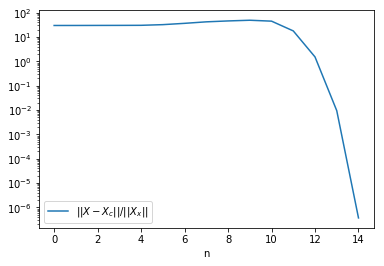

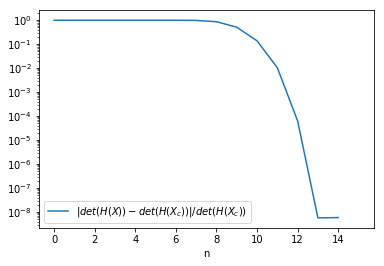

In [8]:
log_log_direction(alg_newton.intermediate_X, alg_newton.intermediate_det)

# Computation with steepest ascent approach

*Warning*: This needs some time and does not even succeed in 20000 iterations, even though the determinant increases in every step.

In [19]:
alg_steepest_ascent = get_algorithm_object(sys, 'steepestascent', discrete_time=False, save_intermediate=True)
alg_steepest_ascent.abs_tol = 10e-1
alg_steepest_ascent.maxiter = 2000000
X0=alg_newton.intermediate_X[6]
alg_steepest_ascent(X0=X0)

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][SteepestAscentDirectionCT] --- Computing Analytic Center with Steepest Ascent approach (direction.py:151)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 0	Residual: 18.417839685688335	Det: 9.08669330343014 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00042278565868531344 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 1	Residual: 18.4177414223851	Det: 9.08673436657052 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.841239327199699e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2	Residual: 18.

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.439958148910536e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 30	Residual: 18.41614957097463	Det: 9.087800940758163 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003849312451000926 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 31	Residual: 18.41608302499766	Det: 9.087836741973588 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.426718031661385e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 32	Residual: 18.4160514372434	Det: 9.087872493527978 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.000384400155247929 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 33	Residual: 18.41598627777079	Det: 9.087908195952892 (direction.py:69)
[INFO    ][Ste

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003779668207247951 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 61	Residual: 18.414780043469907	Det: 9.08888992102139 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.256773940114613e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 62	Residual: 18.41474993981973	Det: 9.088924403368775 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00037756729685847686 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 63	Residual: 18.414703903094058	Det: 9.088958849481848 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.247020306846139e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 64	Residual: 18.414673888311352	Det: 9.08899325982889 (direction.py:69)
[INFO    ]

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.12670841363481e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 92	Residual: 18.4137361294214	Det: 9.089943447974019 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00037233037956313974 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 93	Residual: 18.413706535110414	Det: 9.08997694930651 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 9.119154964857901e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 94	Residual: 18.413677724047798	Det: 9.090010423429092 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00037202614941678024 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 95	Residual: 18.413649137721542	Det: 9.090043870391266 (direction.py:69)
[INFO    ]

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00034660255935336587 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2400	Residual: 18.456795460866424	Det: 9.158887872200848 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003463910364131423 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2500	Residual: 18.458769458436507	Det: 9.161812108177044 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003461849743157133 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2600	Residual: 18.460696546070004	Det: 9.16473385716299 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00034598391353915606 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2700	Residual: 18.46257633223657	Det: 9.167653198472117 (direction.py:69)


[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00034139864672945403 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5500	Residual: 18.496733388168053	Det: 9.248604753317144 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00034125452751963245 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5600	Residual: 18.49736014399813	Det: 9.25147166512009 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.000341111139543145 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5700	Residual: 18.497951753390762	Det: 9.25433707600975 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00034096844788431344 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 5800	Residual: 18.498508813359038	Det: 9.257200996709294 (direction.py:69)
[

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003371721113207601 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8600	Residual: 18.502319712867898	Det: 9.336817515672076 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00033704155492237037 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8700	Residual: 18.502106921482028	Det: 9.339641327172199 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00033691125917119114 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8800	Residual: 18.501874454968398	Det: 9.342463827539314 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00033678120443541193 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 8900	Residual: 18.501622694090827	Det: 9.345285019942867 (direction.py:6

[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00033321999587781944 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 11700	Residual: 18.488077871448596	Det: 9.42375799270323 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003330951820379222 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 11800	Residual: 18.487403191013986	Det: 9.426542323015019 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.00033297051623383983 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 11900	Residual: 18.486717755965255	Det: 9.429325410764633 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003328459953013573 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 12000	Residual: 18.486021770536563	Det: 9.432107257400833 (direction.py

[INFO    ][SteepestAscentDirectionCT] --- Current step: 14700	Residual: 18.463883547507177	Det: 9.506752906703978 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003294101764573647 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 14800	Residual: 18.46295999024905	Det: 9.509500532096178 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003292891362490699 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 14900	Residual: 18.462030267475935	Det: 9.51224695191941 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003291682031966077 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 15000	Residual: 18.461094487454247	Det: 9.514992167310519 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0003290474051617829 (steepestascent.py:38

KeyboardInterrupt: 

In [ ]:
log_log_direction(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det)